In [20]:
import pandas as pd
import numpy as np
import pickle
import os
import sys
from matplotlib import pyplot as plt
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/smc_sampler_functions/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/help/")
import smc_sampler_functions.proposal_kernels
#path = os.getcwd()
#path = path.replace("/ipython_notebooks","")
#path = "/home/alex/inter_simulation_results/hsmc_harvard/results_simulation_log_cox"
path = "/media/alex/Transcend/hsmc/results_simulation_log_cox"
os.chdir(path)
model_name = 'normal_mix'
names_files_list = os.listdir(path)
print(names_files_list)
import getsize_function

['log_coxsampler_HMC_L_random_ft_adaptive_rep_0_dim_100.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_0_dim_1600.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_0_dim_400.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_0_dim_625.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_0_dim_900.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_10_dim_100.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_10_dim_1600.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_10_dim_400.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_10_dim_625.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_10_dim_900.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_11_dim_100.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_11_dim_1600.p', 'log_coxsampler_HMC_L_random_ft_adaptive_rep_11_dim_400.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_4_dim_1600.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_4_dim_400.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_4_dim_625.p', 'log_coxsampler_HMC_L_random_ours_ada

In [7]:
dim_list = [100, 400, 900, 1600]#, 50, 100]
dim_len = len(dim_list)
M = 39
names_samplers = ["sampler_HMC_L_random_ours_adaptive_", "sampler_HMC_L_random_ft_adaptive_","sampler_MALA_"]#, "sampler_RW_"]
names_prop = ['HMCAO', 'HMCAFT', 'MALA']#, 'RW']
num_sampler = len(names_samplers)
norm_const = np.zeros((M, num_sampler, dim_len))
prob_positive = np.zeros((M, num_sampler, dim_len))
trace_mean_particles = np.zeros((M, num_sampler, dim_len))
#trace_var_particles = np.zeros((M, num_sampler, dim_len))
computational_load = np.zeros((M, num_sampler, dim_len))
particles_all = {str(dim) : np.zeros((M, num_sampler,dim)) for dim in dim_list}


In [8]:
for i_dim, dim in enumerate(dim_list):
    for m_rep in range(M):
        for i, name_sampler in enumerate(names_samplers):
            name_to_load = "log_cox"+name_sampler+"rep_%s_dim_%s.p"%(m_rep+1, dim)
            #print name_to_load
            res_dict = pickle.load(open(name_to_load, 'rb'))
            norm_const[m_rep, i, i_dim] = sum(res_dict['Z_list'])
            particles_all[str(dim)][m_rep, i,:] = res_dict['particles_resampled'].mean(axis=0)
            trace_mean_particles[m_rep, i, i_dim] = res_dict['particles_resampled'].mean()
            #trace_var_particles[m_rep, i, i_dim] = res_dict['particles_resampled'].var(axis=1).mean()
            #computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* len(res_dict['L_mean'])
            if 'O' in names_prop[i]:
                computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()+(np.unique(res_dict['temp_list'])).shape[0]*res_dict['L_mean'].mean()
            else: 
                computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()


In [9]:
norm_const

array([[[474.33873577, 490.29792256, 497.38904501, 501.78016721],
        [474.39671183, 490.71314796, 497.33463332, 501.72640063],
        [474.5183718 , 490.48729627, 497.51596473, 501.43812571]],

       [[474.24120544, 491.01510308, 497.58677952, 501.6969745 ],
        [474.44064371, 490.41240209, 497.76920538, 501.52253357],
        [474.64696869, 490.43481966, 497.81982055, 501.64548316]],

       [[474.29731223, 490.61965049, 497.42530612, 501.44216925],
        [474.25092513, 490.60133843, 497.35401803, 501.42734386],
        [474.33592688, 490.4184219 , 497.55660924, 501.67837199]],

       [[474.37738682, 490.40623788, 497.41751152, 501.80376712],
        [474.24914249, 490.55157133, 497.25070197, 501.65359225],
        [474.30461465, 490.43791451, 497.48355132, 502.08894326]],

       [[474.51551182, 490.54489392, 497.67167917, 501.89214064],
        [474.10897048, 490.75520921, 497.17476731, 501.68386906],
        [474.55614003, 490.74869874, 497.86373407, 501.87197258]],



(1024, 1600)
[[0.00592002 0.00833683 0.00622089 0.00896646]
 [0.00404775 0.00250383 0.00194759 0.00227912]
 [0.00204027 0.00358361 0.00739943 0.00800052]]
[[ 40.53709751  64.29024973 102.49088478 180.58644455]
 [ 11.95418946   8.82364804  19.18047206  24.82250836]
 [  8.22999216  19.17880137  34.57454109 105.52312816]]


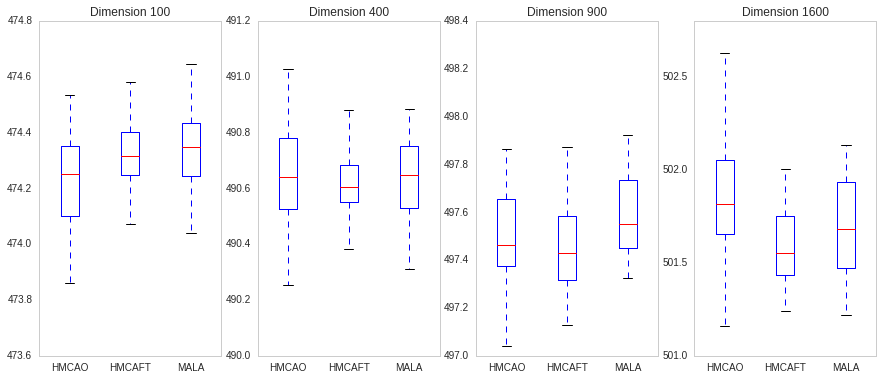

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_palette("husl")
sns.set_palette("PuBuGn_d")

print res_dict['particles_resampled'].shape
print trace_mean_particles.var(axis=0)*computational_load.mean(axis=0)
print norm_const.var(axis=0)*computational_load.mean(axis=0)
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.title('Dimension 100')
plt.boxplot(norm_const[:,:,0], labels=names_prop)
plt.subplot(142)
plt.title('Dimension 400')
plt.boxplot(norm_const[:,:,1], labels=names_prop)
plt.subplot(143)
plt.title('Dimension 900')
plt.boxplot(norm_const[:,:,2], labels=names_prop)
plt.subplot(144)
plt.title('Dimension 1600')
plt.boxplot(norm_const[:,:,3], labels=names_prop)
plt.savefig('log_cox_boxplot_normconst.png'); plt.show()

In [19]:
particles_all['400'].shape
res_dict['parameters']['Y']

KeyError: 'parameters'

In [18]:
#x_res_matrixmean1 = res_first_iteration[0]['particles_resampled'].mean(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])
ngrid = 40
x_res_matrixmean1 = particles_all[str(ngrid**2)][0,0,:].reshape(ngrid, ngrid)
#x_res_matrixmean2 = res_first_iteration[1]['particles_resampled'].mean(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#x_res_matrixvar1 = res_first_iteration[0]['particles_resampled'].var(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#x_res_matrixvar1 = res_repeated_sampling['mean_array'].var(axis=1)[0,:,:].reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#x_res_matrixvar2 = res_first_iteration[1]['particles_resampled'].var(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])


Y_matrix = res_dict['parameters']['Y'].reshape(ngrid,ngrid)
#Y_matrix_samled = Y_sampled.reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#X_matrix = parameters_log_cox['X_true'].reshape(parameters_log_cox['N'],parameters_log_cox['N'])

plt.figure(figsize=(16,10))

plt.subplot(231)
plt.title('Latent field HMCAO')
im = plt.imshow(particles_all[str(ngrid**2)][:,0,:].mean(axis=0).reshape(ngrid, ngrid),cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(232)
plt.title('Latent field HMCAFT')
im = plt.imshow(particles_all[str(ngrid**2)][:,1,:].mean(axis=0).reshape(ngrid, ngrid),cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(233)
plt.title('Latent field MALA')
im = plt.imshow(particles_all[str(ngrid**2)][:,2,:].mean(axis=0).reshape(ngrid, ngrid),cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(234)
plt.title('Latent field RW')
im = plt.imshow(particles_all[str(ngrid**2)][:,3,:].mean(axis=0).reshape(ngrid, ngrid),cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)


plt.subplot(235)
plt.title('Observed Data')
im = plt.imshow(Y_matrix,cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(236)
plt.title('Var Latent field HMCAO')
im = plt.imshow(particles_all[str(ngrid**2)][:,0,:].var(axis=0).reshape(ngrid, ngrid),cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)




#plt.subplot(233)
#plt.title('True latent field')
#im = plt.imshow(X_matrix,cmap='jet')
#plt.colorbar(im,fraction=0.046, pad=0.04)



plt.savefig('log_cox_model_dim_%s.png'%(dim))
plt.show()


KeyError: 'parameters'

In [21]:
(norm_const.var(axis=0)*computational_load.mean(axis=0))[:,0]

array([40.53709751, 11.95418946,  8.22999216])

In [17]:
from tabulate import tabulate

datadim100 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,0]
datadim100 = np.round(datadim100/datadim100[0], decimals=3)

datadim400 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,1]
datadim400 = np.round(datadim400/datadim400[0], decimals=3)

datadim900 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,2]
datadim900 = np.round(datadim900/datadim900[0], decimals=3)

datadim1600 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,3]
datadim1600 = np.round(datadim1600/datadim1600[0], decimals=3)


#datadim400 =  np.round(((norm_const.var(axis=0)*computational_load.mean(axis=0))[:,1]), decimals=3).flatten()
#datadim900 =  np.round(((norm_const.var(axis=0)*computational_load.mean(axis=0))[:,2]), decimals=3).flatten()


first_line = ['Dim']+names_prop
second_line = [100]+datadim100.tolist()
third_line = [400]+datadim400.tolist()
fourth_line = [900]+datadim900.tolist()
fith_line = [1600]+datadim1600.tolist()
data = [first_line, second_line, third_line, fourth_line, fith_line]
header = ["", '', '']
print(tabulate(data, header, tablefmt="latex", floatfmt=".2f"))


\begin{tabular}{llll}
\hline
      &       &        &       \\
\hline
 Dim  & HMCAO & HMCAFT & MALA  \\
 100  & 1.0   & 0.295  & 0.203 \\
 400  & 1.0   & 0.137  & 0.298 \\
 900  & 1.0   & 0.187  & 0.337 \\
 1600 & 1.0   & 0.137  & 0.584 \\
\hline
\end{tabular}
